In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [3]:
df =pd.read_csv("AIML Dataset (2).csv")

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [6]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
df["isFraud"].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

In [8]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    1048575
Name: count, dtype: int64

In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.shape[0]

1048575

In [11]:
df["isFraud"][1] / df.shape[0]

np.float64(0.0)

In [12]:
round((df['isFraud'].value_counts()[1]/df.shape[0])*100,2)

np.float64(0.11)

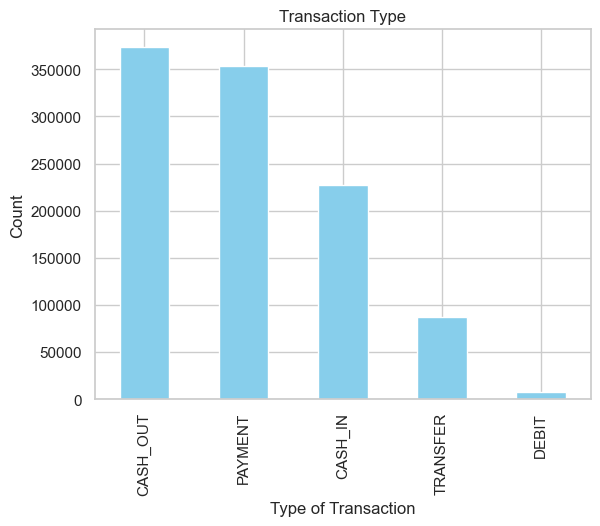

In [13]:
df['type'].value_counts().plot(kind='bar',title='Transaction Type',color ='skyblue')
plt.xlabel('Type of Transaction')
plt.ylabel('Count')
plt.show()

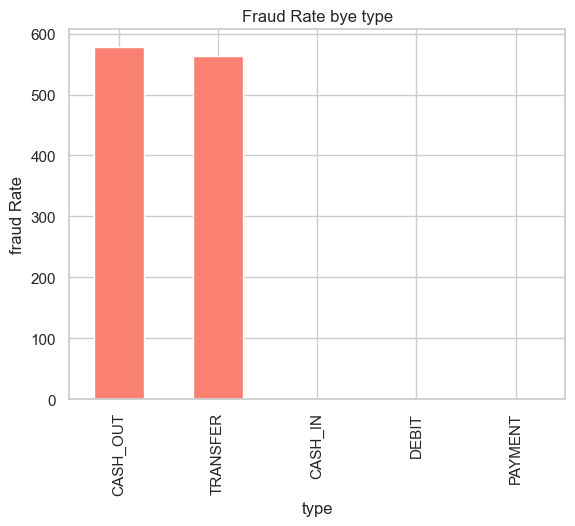

In [14]:
fraud_by_type = df.groupby('type')['isFraud'].sum().sort_values(ascending=False)
fraud_by_type.plot(kind='bar', title='Fraud Rate bye type', color='salmon')
plt.ylabel('fraud Rate')
plt.show()

In [15]:
df['amount'].describe().astype(int)

count     1048575
mean       158666
std        264940
min             0
25%         12149
50%         76343
75%        213761
max      10000000
Name: amount, dtype: int64

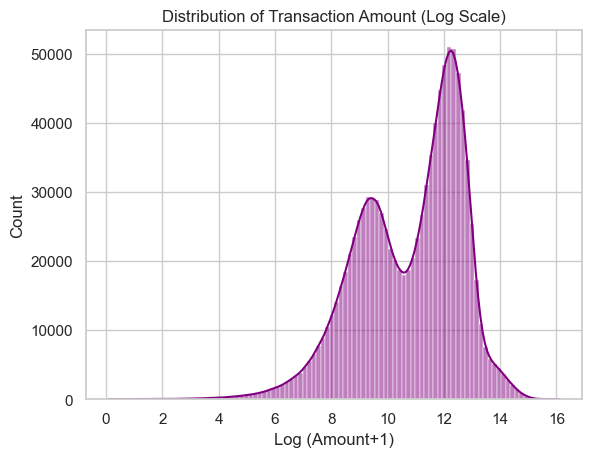

In [16]:
sns.histplot(np.log1p(df['amount']), bins=100,  kde = True ,color='purple')
plt.title('Distribution of Transaction Amount (Log Scale)')
plt.xlabel('Log (Amount+1)')
plt.show()

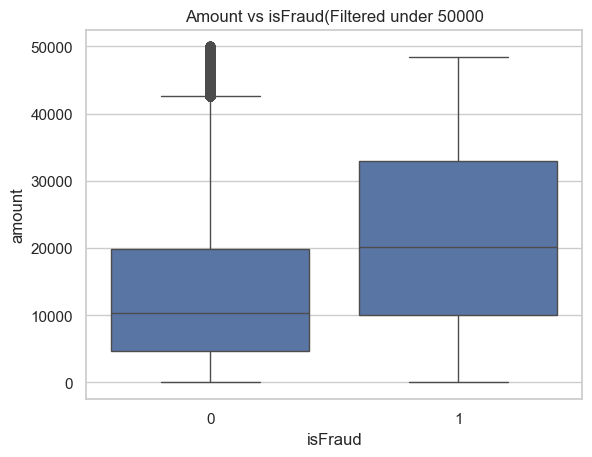

In [17]:
sns.boxplot( data =df[df['amount']<50000], x='isFraud', y='amount', )
plt.title('Amount vs isFraud(Filtered under 50000')
plt.show()


In [18]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [19]:
(df["balanceDiffOrig"]<0).sum()

np.int64(221805)

In [20]:
(df["balanceDiffOrig"]<0).sum()

np.int64(221805)

In [21]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


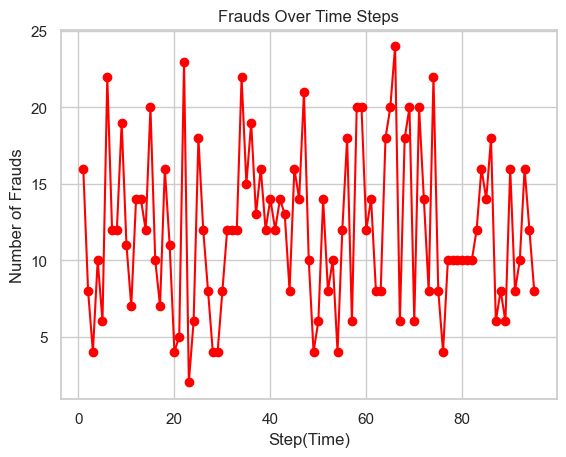

In [22]:
frauds_per_step = df[df['isFraud'] == 1]["step"].value_counts().sort_index()
plt.plot(frauds_per_step.index, frauds_per_step.values, label="Frauds per step", marker='o', color='red')
plt.xlabel("Step(Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time Steps") 
plt.grid(True)
plt.show()

In [23]:
df.drop(columns="step", inplace=True)

In [24]:
df.head()


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [25]:
top_senders = df['nameOrig'].value_counts().head(10)

In [26]:
top_senders

nameOrig
C821145334     2
C693814021     2
C178467166     2
C309111136     2
C2097341930    2
C894095661     2
C1041466144    2
C1322843847    2
C77405061      2
C1561789477    2
Name: count, dtype: int64

In [27]:
top_recivers = df['nameDest'].value_counts().head(10)

In [28]:
top_recivers

nameDest
C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
C2083562754    86
C977993101     82
C1360767589    81
C451111351     80
C306206744     79
Name: count, dtype: int64

In [29]:
fraud_users = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)    

In [30]:
fraud_users

nameOrig
C409531429     1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C824268591     1
C708686257     1
C395839623     1
C358188091     1
Name: count, dtype: int64

In [31]:
fraud_types =df[df["type"] .isin (["TRANSFER","CASH_OUT"])]

In [32]:
fraud_types["type"].value_counts()

type
CASH_OUT    373641
TRANSFER     86753
Name: count, dtype: int64

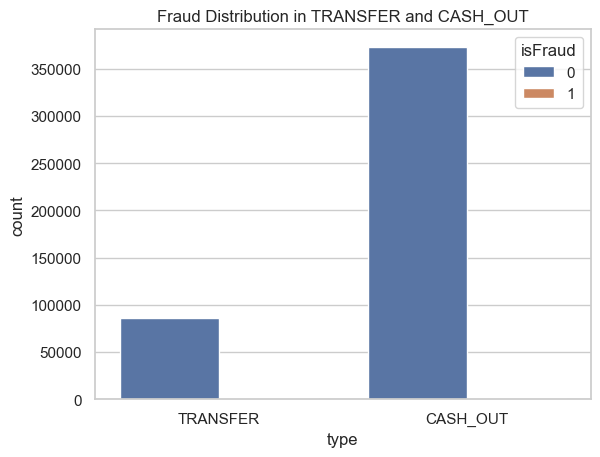

In [33]:
sns.countplot( data=fraud_types, x="type",hue="isFraud")
plt.title('Fraud Distribution in TRANSFER and CASH_OUT')
plt.show()

In [34]:
corr =df[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","balanceDiffOrig","balanceDiffDest","isFraud"]].corr()


In [35]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balanceDiffOrig,balanceDiffDest,isFraud
amount,1.000000,0.004864,-0.001133,0.215558,0.311936,0.131801,0.513277,0.128862
oldbalanceOrg,0.004864,1.000000,0.999047,0.093305,0.064049,-0.248333,-0.118078,0.003829
newbalanceOrig,-0.001133,0.999047,1.000000,0.095182,0.063725,-0.290369,-0.128184,-0.009438
oldbalanceDest,0.215558,0.093305,0.095182,1.000000,0.978403,-0.066818,0.134147,-0.007552
newbalanceDest,0.311936,0.064049,0.063725,0.978403,1.000000,-0.010073,0.336089,-0.000495
balanceDiffOrig,0.131801,-0.248333,-0.290369,-0.066818,-0.010073,1.000000,0.256157,0.293467
balanceDiffDest,0.513277,-0.118078,-0.128184,0.134147,0.336089,0.256157,1.000000,0.032034
isFraud,0.128862,0.003829,-0.009438,-0.007552,-0.000495,0.293467,0.032034,1.000000


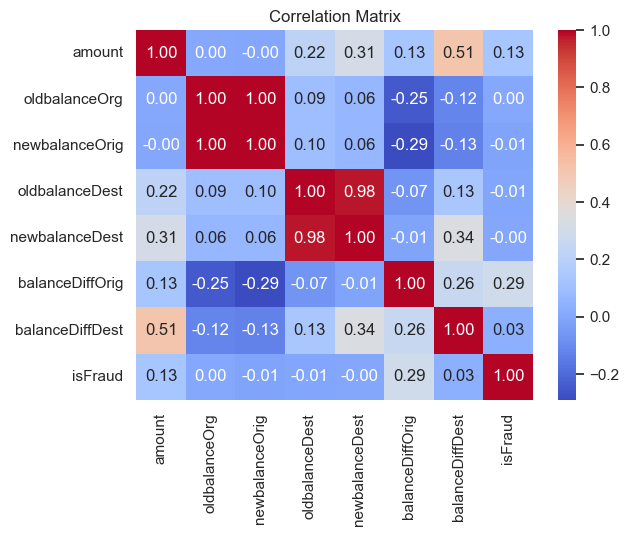

In [36]:
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [37]:
zero_after_transfer = df[
    (df["oldbalanceOrg"]>0) &
    (df["newbalanceOrig"]==0) &
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
    ]

In [38]:
len(zero_after_transfer)

192858

In [39]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.0,0.00
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,705.0,-22425.00
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,10835.0,2712905.89


In [40]:
df["isFraud"].value_counts()

isFraud
0    1047433
1       1142
Name: count, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix    
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import  OneHotEncoder , StandardScaler

In [42]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [43]:
df_model = df.drop(columns=["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [44]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [45]:
categorical = ["type"]
numerical = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","balanceDiffOrig","balanceDiffDest"]

In [46]:
y =df_model["isFraud"]
X= df_model.drop("isFraud", axis=1)    

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)   

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical),
        ("cat", OneHotEncoder(), categorical)
    ],
    remainder="drop"
)


In [49]:
pipeline = Pipeline([
    ("prep",preprocessor),
    ("clif",LogisticRegression(class_weight="balanced",max_iter =1000))
])

In [50]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest',
                                                   'balanceDiffOrig',
                                                   'balanceDiffDest']),
                                                 ('cat', OneHotEncoder(),
                                                  ['type'])])),
                ('clif',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [51]:
y_pred = pipeline.predict(X_test)

In [52]:
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      0.94      0.97    314230
           1       0.02      0.97      0.03       343

    accuracy                           0.94    314573
   macro avg       0.51      0.96      0.50    314573
weighted avg       1.00      0.94      0.97    314573



In [53]:
confusion_matrix(y_test, y_pred)

array([[295161,  19069],
       [    10,    333]])

In [54]:
pipeline.score(X_test, y_test)*100

93.93495309514802

In [55]:
import joblib
joblib.dump(pipeline, "fraud_detection_model.pkl")

['fraud_detection_model.pkl']